#📌 Extracão

In [288]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.json_normalize(requests.get(url).json())
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [289]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [290]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [291]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [292]:
df.duplicated().sum()

np.int64(0)

In [293]:
df = df.apply(lambda x: x.str.strip().str.title() if x.dtype == "object" else x)

In [294]:
df = df[df['Churn'].str.strip() != '']

In [295]:
for col in df.select_dtypes(include="object"):
    print(f"{col}: {df[col].unique()}")

customerID: ['0002-Orfbo' '0003-Mknfe' '0004-Tlhlj' ... '9992-Ujoel' '9993-Lhieb'
 '9995-Hotoh']
Churn: ['No' 'Yes']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No Phone Service']
internet.InternetService: ['Dsl' 'Fiber Optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No Internet Service']
internet.OnlineBackup: ['Yes' 'No' 'No Internet Service']
internet.DeviceProtection: ['No' 'Yes' 'No Internet Service']
internet.TechSupport: ['Yes' 'No' 'No Internet Service']
internet.StreamingTV: ['Yes' 'No' 'No Internet Service']
internet.StreamingMovies: ['No' 'Yes' 'No Internet Service']
account.Contract: ['One Year' 'Month-To-Month' 'Two Year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed Check' 'Electronic Check' 'Credit Card (Automatic)'
 'Bank Transfer (Automatic)']
account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.

In [296]:
espacos = df.select_dtypes(include='object').apply(lambda s: s.str.contains(r'^\s|\s$').sum())
print("Colunas com espaços extras no início/fim:")
print(espacos[espacos > 0])

for col in df.select_dtypes(include='object').columns[:10]:
    print(f"{col}: {sorted(df[col].unique())[:10]}")

Colunas com espaços extras no início/fim:
Series([], dtype: int64)
customerID: ['0002-Orfbo', '0003-Mknfe', '0004-Tlhlj', '0011-Igkff', '0013-Exchz', '0013-Mhzwf', '0013-Smeoe', '0014-Bmaqu', '0015-Uocoj', '0016-Qljis']
Churn: ['No', 'Yes']
customer.gender: ['Female', 'Male']
customer.Partner: ['No', 'Yes']
customer.Dependents: ['No', 'Yes']
phone.PhoneService: ['No', 'Yes']
phone.MultipleLines: ['No', 'No Phone Service', 'Yes']
internet.InternetService: ['Dsl', 'Fiber Optic', 'No']
internet.OnlineSecurity: ['No', 'No Internet Service', 'Yes']
internet.OnlineBackup: ['No', 'No Internet Service', 'Yes']


In [297]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [298]:
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(
    df['account.Charges.Monthly'] * df['customer.tenure']
)

In [299]:
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [300]:
print(df.duplicated().sum())

0


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [302]:
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30
print(df[['account.Charges.Monthly', 'Contas_Diarias']].head())

   account.Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667


In [303]:
map_binario = {'yes': 1, 'no': 0, 'sim': 1, 'não': 0, 'nao': 0, 'female': 0, 'male': 1}

colunas_para_transformar = [
    'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling', 'Churn', 'customer.gender'
]

for col in colunas_para_transformar:
    if col in df.columns:
        df[col] = df[col].str.lower().map(map_binario)

In [304]:
df.rename(columns={
    'customerID': 'ClienteID',
    'Churn': 'Evasao',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'TempoClienteMeses',
    'phone.PhoneService': 'ServicoTelefone',
    'phone.MultipleLines': 'MultiplasLinhas',
    'internet.InternetService': 'ServicoInternet',
    'internet.OnlineSecurity': 'SegurancaOnline',
    'internet.OnlineBackup': 'BackupOnline',
    'internet.DeviceProtection': 'ProtecaoDispositivo',
    'internet.TechSupport': 'SuporteTecnico',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingFilmes',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'FaturaDigital',
    'account.PaymentMethod': 'MetodoPagamento',
    'account.Charges.Monthly': 'CobrancaMensal',
    'account.Charges.Total': 'CobrancaTotal',
    'Contas_Diarias': 'CobrancaDiaria'
}, inplace=True)

In [305]:
print(df[['Evasao', 'Parceiro', 'ServicoTelefone', 'Genero', 'CobrancaMensal']].head())

   Evasao  Parceiro  ServicoTelefone  Genero  CobrancaMensal
0       0         1                1       0            65.6
1       0         0                1       1            59.9
2       1         0                1       1            73.9
3       1         1                1       1            98.0
4       1         1                1       0            83.9


In [306]:
df_numerico = df.select_dtypes(include=['number'])

analise_descritiva = pd.DataFrame({
    'Média': df_numerico.mean(),
    'Mediana': df_numerico.median(),
    'Desvio Padrão': df_numerico.std(),
    'Mínimo': df_numerico.min(),
    'Máximo': df_numerico.max()
})

analise_descritiva

,Média,Mediana,Desvio Padrão,Mínimo,Máximo
Evasao,0.265370,0.000,0.441561,0.000000,1.000000
Genero,0.504756,1.000,0.500013,0.000000,1.000000
Idoso,0.162147,0.000,0.368612,0.000000,1.000000
Parceiro,0.483033,0.000,0.499748,0.000000,1.000000
Dependentes,0.299588,0.000,0.458110,0.000000,1.000000
TempoClienteMeses,32.371149,29.000,24.559481,0.000000,72.000000
ServicoTelefone,0.903166,1.000,0.295752,0.000000,1.000000
MultiplasLinhas,0.467065,0.000,0.498953,0.000000,1.000000
SegurancaOnline,0.365960,0.000,0.481742,0.000000,1.000000
BackupOnline,0.440276,0.000,0.496465,0.000000,1.000000


#📊 Carga e análise

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
for col in variaveis_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

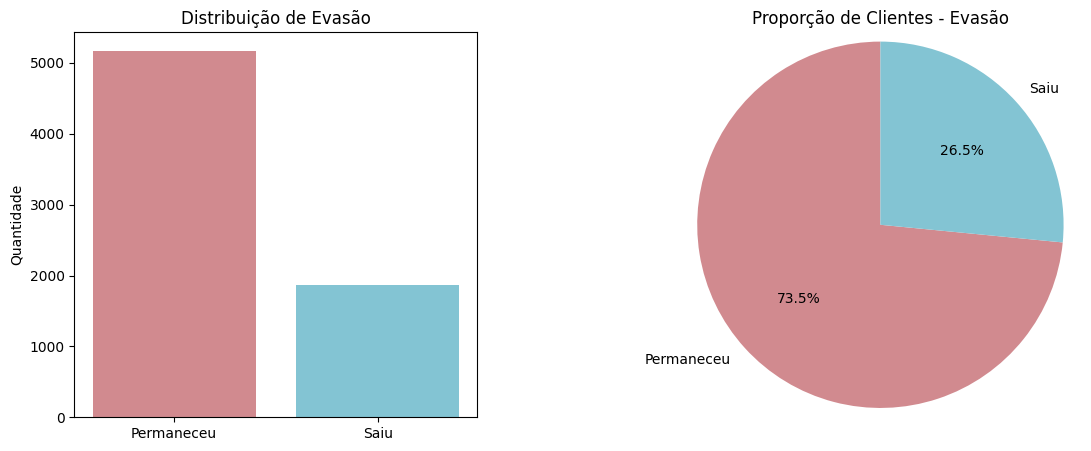

In [309]:
contagem_churn = df['Evasao'].value_counts()
cores = ['#d18a8f', '#83c4d3']

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].bar(contagem_churn.index, contagem_churn.values, color=cores)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Permaneceu', 'Saiu'])
axes[0].set_ylabel('Quantidade')
axes[0].set_title('Distribuição de Evasão')

axes[1].pie(contagem_churn, labels=['Permaneceu', 'Saiu'],
            autopct='%1.1f%%', colors=cores, startangle=90)
axes[1].set_title('Proporção de Clientes - Evasão')
axes[1].axis('equal')

plt.subplots_adjust(wspace=0.5)
plt.show()

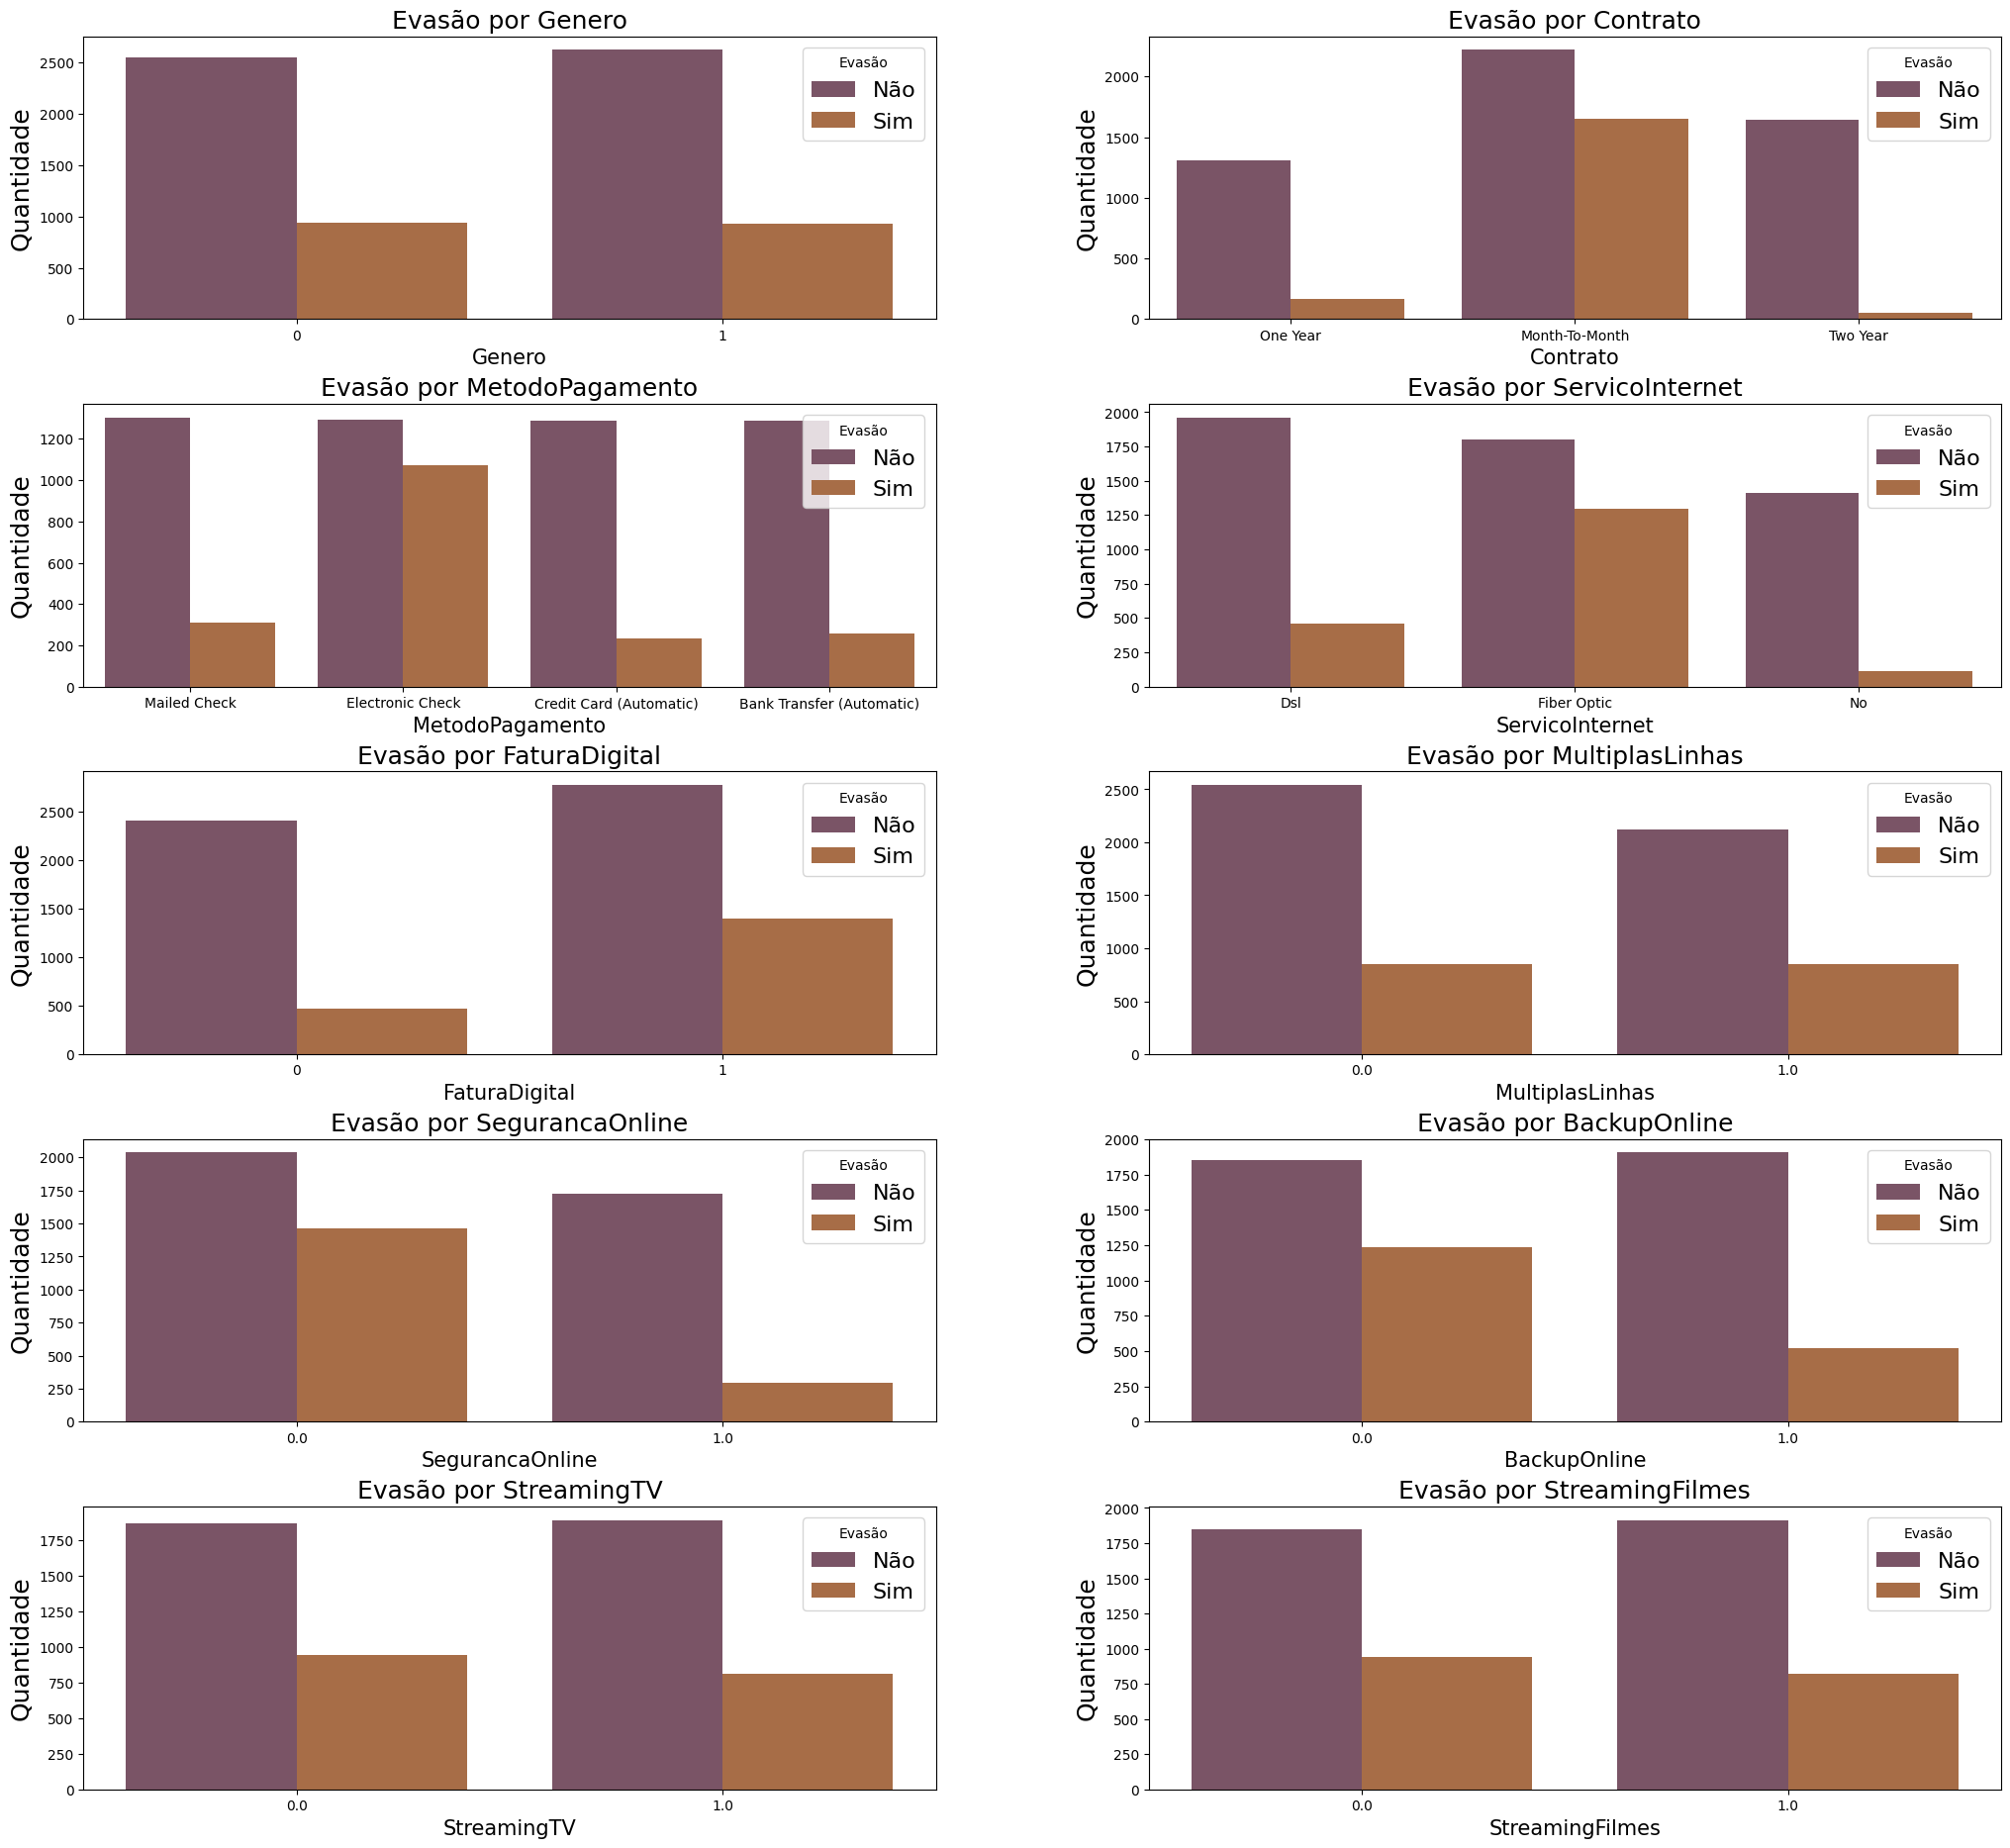

In [310]:
variaveis_categoricas = [
    'Genero', 'Contrato', 'MetodoPagamento', 'ServicoInternet',
    'FaturaDigital', 'MultiplasLinhas', 'SegurancaOnline',
    'BackupOnline', 'StreamingTV', 'StreamingFilmes'
]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(25, 23))

for ax, var in zip(axes.flatten(), variaveis_categoricas):
    sns.countplot(data=df, x=var, hue='Evasao', palette=['#814d66', '#b76a37'], ax=ax)
    ax.set_title(f'Evasão por {var}', fontsize=18)
    ax.set_xlabel(var, fontsize=15)
    ax.set_ylabel('Quantidade',fontsize=18)
    ax.legend(title='Evasão', labels=['Não', 'Sim'], fontsize=16)

plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()

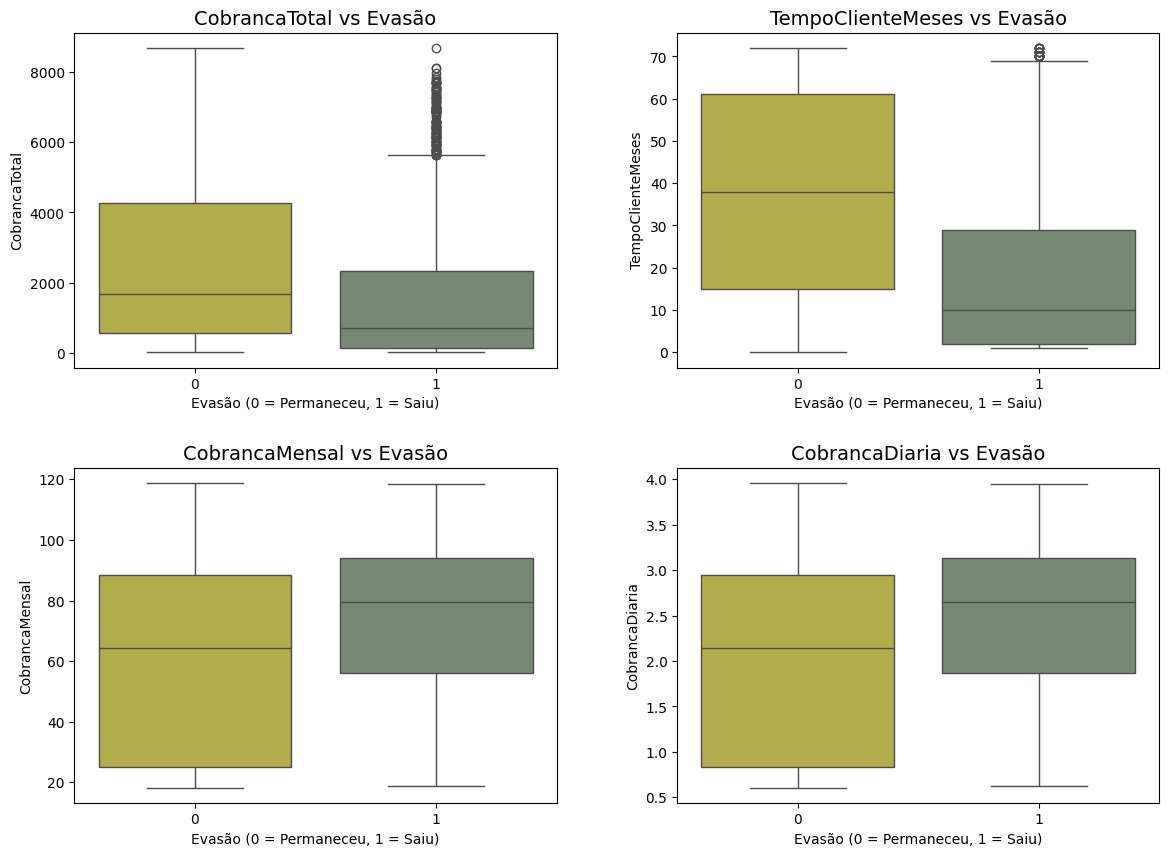

In [311]:
variaveis_numericas = ['CobrancaTotal', 'TempoClienteMeses', 'CobrancaMensal', 'CobrancaDiaria']

plt.figure(figsize=(14, 10))

for i, var in enumerate(variaveis_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        data=df,
        x='Evasao',
        y=var,
        hue='Evasao',
        palette=['#c3bc3b', '#758c72'],
        legend=False
    )
    plt.title(f'{var} vs Evasão', fontsize=14)
    plt.xlabel('Evasão (0 = Permaneceu, 1 = Saiu)')

plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()

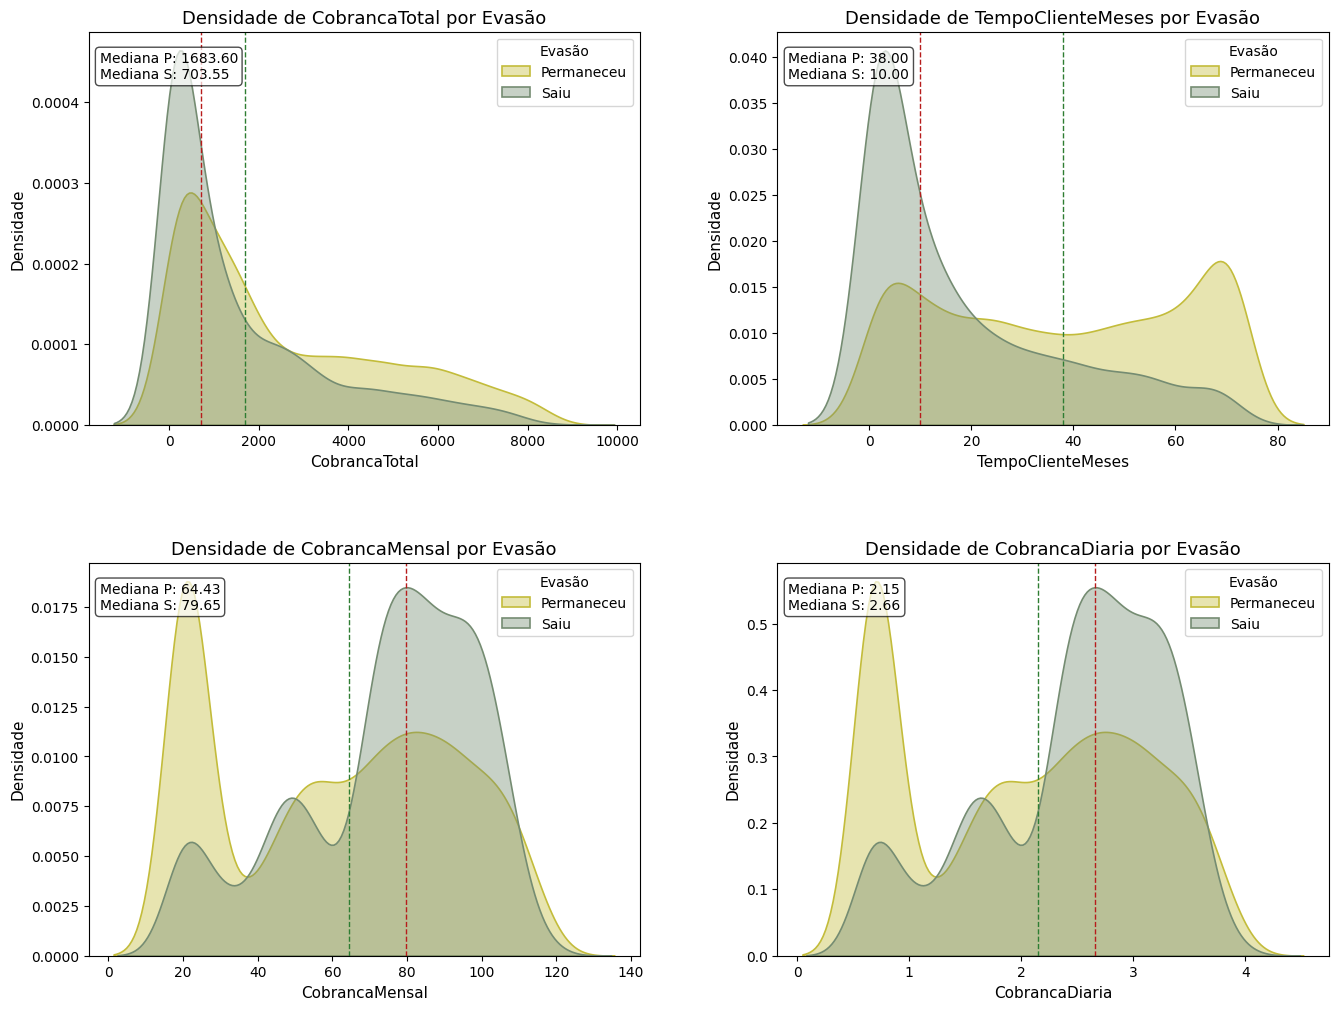

In [312]:
variaveis_numericas = ['CobrancaTotal', 'TempoClienteMeses', 'CobrancaMensal', 'CobrancaDiaria']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for ax, var in zip(axes, variaveis_numericas):
    sns.kdeplot(
        data=df[df['Evasao'] == 0],
        x=var,
        fill=True,
        alpha=0.4,
        linewidth=1.2,
        label='Permaneceu',
        color='#c3bc3b',
        ax=ax
    )
    sns.kdeplot(
        data=df[df['Evasao'] == 1],
        x=var,
        fill=True,
        alpha=0.4,
        linewidth=1.2,
        label='Saiu',
        color='#758c72',
        ax=ax
    )

    med0 = df.loc[df['Evasao'] == 0, var].median()
    med1 = df.loc[df['Evasao'] == 1, var].median()
    ax.axvline(med0, color='#2e7d32', linestyle='--', linewidth=1)
    ax.axvline(med1, color='#b71c1c', linestyle='--', linewidth=1)
    ax.text(0.02, 0.95, f'Mediana P: {med0:.2f}\nMediana S: {med1:.2f}',
            transform=ax.transAxes, fontsize=10, va='top',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

    ax.set_title(f'Densidade de {var} por Evasão', fontsize=13)
    ax.set_xlabel(var, fontsize=11)
    ax.set_ylabel('Densidade', fontsize=11)
    ax.tick_params(axis='both', labelsize=10)
    ax.legend(title='Evasão')

plt.subplots_adjust(hspace=0.35, wspace=0.25)
plt.show()


#📄Relatorio Final

## 1. Introdução 📊
O presente trabalho teve como objetivo analisar os dados de clientes da **Telecom X**, visando compreender os principais fatores que influenciam a **evasão (Churn)**.  
A evasão de clientes é um dos maiores desafios para empresas do setor de telecomunicações, pois impacta diretamente na **receita recorrente** e nos custos de aquisição de novos clientes.  

A análise busca:
- 🔍 Identificar padrões e perfis de clientes mais propensos ao cancelamento.

- 💡 Gerar insights estratégicos para retenção de clientes.

- 🧮 Fornecer subsídios para a construção de modelos preditivos.

---

## 2. Limpeza e Tratamento de Dados 🧹💾
As etapas de preparação dos dados foram:

1. **📥 Importação dos dados**  
   - Fonte: API (JSON) hospedada no GitHub.  
   - Link direto:  
     `https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json`
   - Leitura via `requests` e transformação para `DataFrame` com `json_normalize`.

2. **🛠 Padronização e ajustes**  
   - Conversão de tipos de dados para formatos adequados (`int`, `float`, `category`).
   - Renomeação de colunas para `snake_case` e nomes claros.
   - Criação de variáveis derivadas como:
     - `📅 CobrancaDiaria` (cálculo a partir de cobrança mensal / 30 dias).
     - `⏳ TempoClienteMeses` (quando necessário).

3. **🩺 Tratamento de valores ausentes e inconsistentes**  
   - Remoção ou imputação de valores faltantes conforme a variável.
   - Correção de erros de formatação (por exemplo, strings duplicadas ou espaços).

---

## 3. Análise Exploratória de Dados 🔍📈

A EDA buscou compreender **características demográficas, contratuais e financeiras** associadas à evasão.

### 3.1 📊 Análise de variáveis categóricas
- **Gênero, Tipo de Contrato, Método de Pagamento**, entre outras variáveis, foram analisadas com gráficos de **pizza** e **barras** para verificar distribuição entre clientes que **permaneceram** e **saíram**.

**Principais observações:**
- 📆 Contratos **mensais** têm taxa de evasão mais alta.
- 💳 Pagamentos via **cartão de crédito** ou **débito automático** tendem a apresentar menor churn.
- 🚻 Diferença pouco expressiva entre gêneros na evasão.

### 3.2 📉 Análise de variáveis numéricas
Variáveis analisadas:  
`CobrancaTotal`, `TempoClienteMeses`, `CobrancaMensal`, `CobrancaDiaria`.

-  Foram utilizados **boxplots** e **gráficos de densidade (KDE)** para verificar a distribuição das variáveis entre **evasão = 0** (permaneceu) e **evasão = 1** (saiu).
- Incluídas **linhas de mediana** para comparação entre grupos.

**Padrões encontrados:**
- ⏱ Clientes que saíram tendem a ter **tempo de contrato menor**.
- 💰 CobrancaMensal mais alta está associada a maior evasão.
- 📊 CobrancaTotal é naturalmente menor para quem saiu cedo, mas alguns casos mostram alto valor total e mesmo assim evasão.

---

## 4. Conclusões e Insights 💡✅
- ⏳ Tempo de permanência é um forte indicador de churn.
- 📈 Planos com **cobrança mensal alta** geram maior evasão.
- 📜 Contratos **anuais** ou **bianuais** são mais estáveis.
- 💳 Pagamento automático → aumenta fidelização.
- 📦 Mais serviços agregados → maior retenção.

.

---

## 5. Recomendações 🎯📌
Com base nos achados, sugerem-se ações estratégicas para redução da evasão:

- 🎁 Descontos/benefícios nos primeiros meses para reter clientes novos.
- 🔒 Incentivar contratos mais longos com preços diferenciados.
- 📉 Oferecer planos mais econômicos para clientes com cobrança mensal elevada.
- 💳 Facilitar adesão ao pagamento automático.
- 📡 Monitorar indicadores de churn e alimentar um **modelo preditivo**.

---

## 6. Próximos Passos 🚀🤖
- 🧠 Implementar **modelos de Machine Learning** para prever evasão antes que ocorra.
- 🧪 Testar **campanhas piloto** com grupos de clientes em risco para avaliar impacto.
- 📞 Integrar esta análise com dados de **atendimento e suporte**, buscando identificar causas de insatisfação.


#📈 Extra: Análise de Correlação entre Variáveis

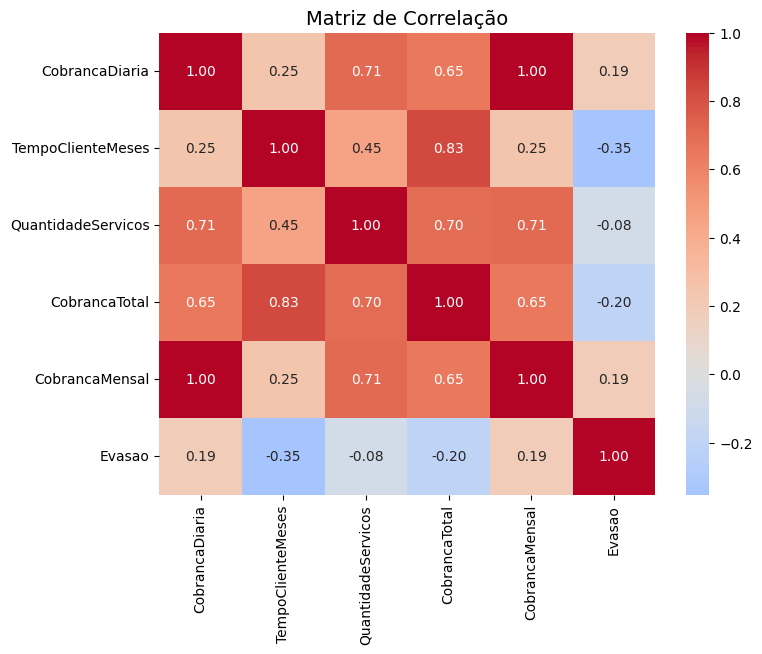

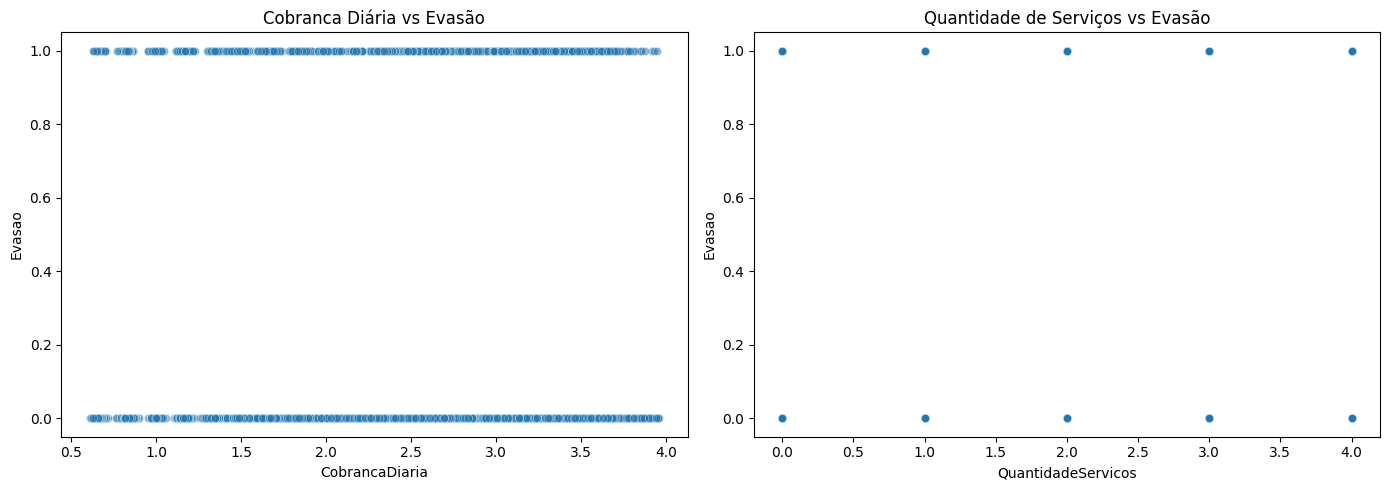

In [313]:
if 'QuantidadeServicos' not in df.columns:

    df['QuantidadeServicos'] = (
        df[['StreamingTV', 'SegurancaOnline', 'BackupOnline', 'ServicoInternet', 'ServicoTelefone']]
        .apply(lambda x: sum(x == 1), axis=1)
    )

variaveis_corr = ['CobrancaDiaria', 'TempoClienteMeses', 'QuantidadeServicos', 'CobrancaTotal', 'CobrancaMensal', 'Evasao']

corr = df[variaveis_corr].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação", fontsize=14)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=df, x='CobrancaDiaria', y='Evasao', alpha=0.5, ax=axes[0])
axes[0].set_title("Cobranca Diária vs Evasão")

sns.scatterplot(data=df, x='QuantidadeServicos', y='Evasao', alpha=0.5, ax=axes[1])
axes[1].set_title("Quantidade de Serviços vs Evasão")

plt.tight_layout()
plt.show()